In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys

In [2]:
df_data = pd.read_csv('./data/data.csv',
                             header=None)
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [3]:
def parse_col(col):
    try:
        return 'V%d' % (int(col) + 1)
    except:
        return col

parser = np.vectorize(parse_col)

In [4]:
cols = df_data.columns.values
parsed_cols = parser(cols)

In [5]:
df_data.columns = parsed_cols
df_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V581,V582,V583,V584,V585,V586,V587,V588,V589,V590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [6]:
df_important_vars = pd.read_csv('./data/var_importance.csv',
                    header=None)

important_vars = df_important_vars.as_matrix()
not_important = np.setdiff1d(parsed_cols, important_vars)

In [7]:
#df_data.drop(not_important, axis=1, inplace=True)
df_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V581,V582,V583,V584,V585,V586,V587,V588,V589,V590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [8]:
df_labels = pd.read_csv('./data/labels.csv',
                    header=None,
                    parse_dates=[1])

df_labels.columns = [ 'RESULTS', 'TIMESTAMP' ]
df_labels['INDEX'] = range(0, len(df_labels))
df_labels.head()

,RESULTS,TIMESTAMP,INDEX
0,-1,2008-07-19 11:55:00,0
1,-1,2008-07-19 12:32:00,1
2,1,2008-07-19 13:17:00,2
3,-1,2008-07-19 14:43:00,3
4,-1,2008-07-19 15:22:00,4


In [9]:
df_concat = pd.concat([df_data, df_labels], axis=1)
df_concat.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V584,V585,V586,V587,V588,V589,V590,RESULTS,TIMESTAMP,INDEX
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00,2
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00,3
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00,4


In [10]:
df_data['INDEX'] = range(0, len(df_data))

In [11]:
df_cor = df_concat.corr()
df_cor.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V583,V584,V585,V586,V587,V588,V589,V590,RESULTS,INDEX
V1,1.000000,-0.145071,0.004775,-0.007655,-0.011047,NaN,0.002281,0.031510,-0.052731,0.009052,...,0.000225,0.023469,0.019921,0.023605,0.018472,-0.025909,-0.028196,0.004177,-0.025144,0.093141
V2,-0.145071,1.000000,0.005802,-0.007603,-0.001641,NaN,-0.025702,-0.012084,0.031321,0.024015,...,0.043690,0.002905,-0.001264,0.002273,-0.009417,0.017290,0.010134,0.044834,-0.002615,-0.007699
V3,0.004775,0.005802,1.000000,0.298935,0.095891,NaN,-0.136225,-0.273970,0.023609,0.016291,...,-0.006061,0.015711,0.018237,0.015765,-0.025548,-0.029479,-0.030943,-0.033226,-0.000957,-0.009372
V4,-0.007655,-0.007603,0.298935,1.000000,-0.058483,NaN,-0.685835,0.138290,-0.103656,0.068998,...,0.009045,0.025461,0.024754,0.026043,0.034779,-0.039309,-0.033780,-0.081157,-0.024631,0.159197
V5,-0.011047,-0.001641,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.916410,-0.026035,0.054619,...,0.045361,-0.001301,-0.001598,-0.001617,-0.044016,-0.031145,-0.026204,0.051428,-0.013760,0.069046


In [12]:
df_results = df_cor.drop( df_cor.index[ len(df_cor) -1 ] )

In [13]:
df_results = df_results[['RESULTS']]
df_results.head()

,RESULTS
V1,-0.025144
V2,-0.002615
V3,-0.000957
V4,-0.024631
V5,-0.013760


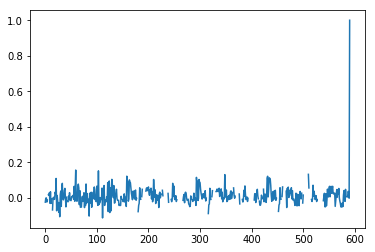

In [14]:
#plt.xticks( results.index.values ) # location, labels
plt.plot( df_results.as_matrix() )
plt.show()

In [15]:
np.min(df_labels[['TIMESTAMP']])

TIMESTAMP   2008-01-08 02:02:00
dtype: datetime64[ns]

In [16]:
np.max(df_labels[['TIMESTAMP']])

TIMESTAMP   2008-12-10 18:47:00
dtype: datetime64[ns]

In [17]:
len(df_labels[['RESULTS']] == 1)

1567

In [18]:
len(df_labels[['RESULTS']] == -1)

1567

In [19]:
df_join = df_labels.join(df_data, lsuffix='_caller', rsuffix='_other')
df_join['INDEX'] = df_join['INDEX_caller']
df_join = df_join.drop('INDEX_caller', 1)
df_join = df_join.drop('INDEX_other', 1)
df_join = df_join.drop('INDEX', 1)
df_join

,RESULTS,TIMESTAMP,V1,V2,V3,V4,V5,V6,V7,V8,...,V581,V582,V583,V584,V585,V586,V587,V588,V589,V590
0,-1,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,-1,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,-1,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,-1,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,-1,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,-1,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,-1,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,-1,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [20]:
df_data.to_csv('./data/data_features.csv')
df_labels.to_csv('./data/data_results.csv')
df_join.to_csv('./data/data_join.csv',date_format='%Y-%m-%d %H:%M:%S')

In [43]:
mean = pd.Series(pd.DataFrame.mean(df_join), name='mean')
std = pd.Series(pd.DataFrame.std(df_join), name='std')

pd.concat([mean, std], axis=1).to_dict(orient='index')

{'RESULTS': {'mean': -0.86726228462029353, 'std': 0.49801044473563622},
 'V1': {'mean': 3014.4528955797564, 'std': 73.621786748530766},
 'V10': {'mean': -0.00084102236421725247, 'std': 0.015116189521664193},
 'V100': {'mean': 0.0015401024983984631, 'std': 0.062740393429446997},
 'V101': {'mean': -2.1268417680973738e-05, 'std': 0.00035553669121934488},
 'V102': {'mean': -7.2389493914157597e-06, 'std': 0.00022076237351255197},
 'V103': {'mean': 0.0011146060217809099, 'std': 0.062967663999899962},
 'V104': {'mean': -0.0097890734824281136, 'std': 0.0030645488768766076},
 'V105': {'mean': -1.4632587859424918e-05, 'std': 0.00085070863861373398},
 'V106': {'mean': -0.00049788597053171044, 'std': 0.0032023291827482777},
 'V107': {'mean': 0.0005395259449071109, 'std': 0.0029879127490006351},
 'V108': {'mean': -0.0017659192825112101, 'std': 0.08747477543703755},
 'V109': {'mean': -0.010788597053171044, 'std': 0.086757765251462726},
 'V11': {'mean': 0.00014575079872204463, 'std': 0.00930210506944

# Output for Generic STRAD-wheel

In [21]:
df_month_day = df_join
df_month_day['m'] = pd.DatetimeIndex(df_month_day['TIMESTAMP']).month - 1
df_month_day['d'] = pd.DatetimeIndex(df_month_day['TIMESTAMP']).dayofweek
df_month_day['h'] = pd.DatetimeIndex(df_month_day['TIMESTAMP']).hour
df_month_day = df_month_day.sort_values(['m', 'd','h'], ascending=[True, True, True])

In [236]:
df_month_day

,RESULTS,TIMESTAMP,V1,V2,V3,V4,V5,V6,V7,V8,...,V585,V586,V587,V588,V589,V590,INDEX,m,d,h
63,-1,2008-01-08 02:02:00,3016.64,2492.80,2246.4889,1006.9548,1.0997,100.0,103.3222,0.1184,...,0.0040,2.9336,0.0296,0.0062,0.0018,20.8909,63,0,1,2
64,1,2008-01-08 05:52:00,2980.84,2628.76,2187.5222,1268.6598,1.4503,100.0,102.4622,0.1233,...,0.0061,5.7753,0.0297,0.0556,0.0150,187.3554,64,0,1,5
65,-1,2008-01-08 10:20:00,2847.81,2461.38,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,...,0.0028,1.8722,0.0343,0.0115,0.0032,33.4515,65,0,1,10
66,-1,2008-01-08 10:26:00,NaN,2544.52,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,...,0.0029,2.3957,0.0139,0.0187,0.0064,134.2014,66,0,1,10
67,-1,2008-01-08 11:28:00,2975.64,2508.28,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,...,0.0033,2.3709,0.0139,0.0187,0.0064,134.2014,67,0,1,11
68,-1,2008-01-08 12:29:00,3066.19,2702.64,2246.4889,1006.9548,1.0997,100.0,103.3222,0.1184,...,0.0031,2.8813,0.0110,0.0134,0.0040,121.5476,68,0,1,12
69,-1,2008-01-08 14:07:00,2873.35,2565.80,2220.5445,1192.8757,1.3872,100.0,106.2567,0.1218,...,0.0035,2.9823,0.0192,0.0125,0.0041,65.2312,69,0,1,14
70,-1,2008-01-08 15:10:00,3045.03,2315.76,2246.4889,1006.9548,1.0997,100.0,103.3222,0.1184,...,0.0045,3.9690,0.0108,0.0106,0.0035,98.1735,70,0,1,15
618,-1,2008-01-09 00:01:00,2993.11,2498.91,2171.8556,940.9917,1.2906,100.0,103.4733,0.1234,...,0.0037,2.5402,0.0227,0.0149,0.0052,65.4831,618,0,2,0
619,-1,2008-01-09 00:39:00,2987.75,2574.53,2183.5000,1099.0027,1.3593,100.0,104.4156,0.1220,...,0.0033,2.3766,0.0227,0.0149,0.0052,65.4831,619,0,2,0


In [237]:
df_passed = df_month_day[df_month_day['RESULTS'] == -1]
df_passed.head()

,RESULTS,TIMESTAMP,V1,V2,V3,V4,V5,V6,V7,V8,...,V585,V586,V587,V588,V589,V590,INDEX,m,d,h
63,-1,2008-01-08 02:02:00,3016.64,2492.80,2246.4889,1006.9548,1.0997,100.0,103.3222,0.1184,...,0.0040,2.9336,0.0296,0.0062,0.0018,20.8909,63,0,1,2
65,-1,2008-01-08 10:20:00,2847.81,2461.38,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,...,0.0028,1.8722,0.0343,0.0115,0.0032,33.4515,65,0,1,10
66,-1,2008-01-08 10:26:00,NaN,2544.52,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,...,0.0029,2.3957,0.0139,0.0187,0.0064,134.2014,66,0,1,10
67,-1,2008-01-08 11:28:00,2975.64,2508.28,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,...,0.0033,2.3709,0.0139,0.0187,0.0064,134.2014,67,0,1,11
68,-1,2008-01-08 12:29:00,3066.19,2702.64,2246.4889,1006.9548,1.0997,100.0,103.3222,0.1184,...,0.0031,2.8813,0.0110,0.0134,0.0040,121.5476,68,0,1,12


In [238]:
df_failed = df_month_day[df_month_day['RESULTS'] == 1]
df_failed.head()

,RESULTS,TIMESTAMP,V1,V2,V3,V4,V5,V6,V7,V8,...,V585,V586,V587,V588,V589,V590,INDEX,m,d,h
64,1,2008-01-08 05:52:00,2980.84,2628.76,2187.5222,1268.6598,1.4503,100.0,102.4622,0.1233,...,0.0061,5.7753,0.0297,0.0556,0.0150,187.3554,64,0,1,5
634,1,2008-01-09 19:54:00,2990.76,2449.25,2172.9667,1058.2061,0.8433,100.0,104.7189,0.1232,...,0.0093,7.3862,0.0328,0.0235,0.0068,71.5333,634,0,2,19
1211,1,2008-01-10 05:56:00,3037.63,2524.13,2194.9555,1108.2246,1.2476,100.0,102.2822,0.1202,...,0.0059,5.3287,0.0284,0.0209,0.0058,73.5120,1211,0,3,5
1227,1,2008-02-10 03:17:00,3057.45,2457.42,2173.4889,1145.7970,0.9402,100.0,104.0556,0.1247,...,0.0040,2.7314,0.0102,0.0133,0.0053,130.0641,1227,1,6,3
1238,1,2008-02-10 09:10:00,3060.00,2571.41,2199.6556,1140.3983,1.3369,100.0,103.0967,0.1227,...,0.0022,1.8910,0.0193,0.0072,0.0026,37.6251,1238,1,6,9


In [239]:
df_grouped_all = df_month_day.groupby(["m", "d"]).size().reset_index(name="v")
len(df_grouped_all)

49

In [240]:
df_grouped_passed = df_passed.groupby(["m", "d"]).size().reset_index(name="v")
len(df_grouped_passed)

48

In [241]:
print('month_min', df_grouped_passed['m'].min() ,'month_max:', df_grouped_passed['m'].max() ,'day_min:', df_grouped_passed['d'].min() ,'day_max:', df_grouped_passed['d'].max() )

month_min 0 month_max: 11 day_min: 0 day_max: 6


In [242]:
df_grouped_failed = df_failed.groupby(["m", "d"]).size().reset_index(name="v")
len(df_grouped_failed)

32

In [243]:
print('month_min', df_grouped_failed['m'].min() ,'month_max:', df_grouped_failed['m'].max() ,'day_min:', df_grouped_failed['d'].min() ,'day_max:', df_grouped_failed['d'].max() )

month_min 0 month_max: 10 day_min: 0 day_max: 6


In [244]:
df_grouped_passed.T.to_dict().values()

dict_values([{'m': 0, 'd': 1, 'v': 7}, {'m': 0, 'd': 2, 'v': 25}, {'m': 0, 'd': 3, 'v': 16}, {'m': 1, 'd': 4, 'v': 1}, {'m': 1, 'd': 5, 'v': 62}, {'m': 1, 'd': 6, 'v': 30}, {'m': 2, 'd': 0, 'v': 25}, {'m': 2, 'd': 5, 'v': 10}, {'m': 2, 'd': 6, 'v': 14}, {'m': 3, 'd': 1, 'v': 16}, {'m': 3, 'd': 2, 'v': 13}, {'m': 3, 'd': 3, 'v': 17}, {'m': 4, 'd': 3, 'v': 27}, {'m': 4, 'd': 4, 'v': 2}, {'m': 4, 'd': 5, 'v': 26}, {'m': 5, 'd': 1, 'v': 43}, {'m': 5, 'd': 6, 'v': 18}, {'m': 6, 'd': 0, 'v': 7}, {'m': 6, 'd': 1, 'v': 21}, {'m': 6, 'd': 2, 'v': 20}, {'m': 6, 'd': 3, 'v': 30}, {'m': 6, 'd': 5, 'v': 9}, {'m': 6, 'd': 6, 'v': 11}, {'m': 7, 'd': 0, 'v': 36}, {'m': 7, 'd': 1, 'v': 33}, {'m': 7, 'd': 2, 'v': 31}, {'m': 7, 'd': 3, 'v': 83}, {'m': 7, 'd': 4, 'v': 103}, {'m': 7, 'd': 5, 'v': 87}, {'m': 7, 'd': 6, 'v': 60}, {'m': 8, 'd': 0, 'v': 66}, {'m': 8, 'd': 1, 'v': 58}, {'m': 8, 'd': 2, 'v': 32}, {'m': 8, 'd': 3, 'v': 43}, {'m': 8, 'd': 4, 'v': 57}, {'m': 8, 'd': 5, 'v': 72}, {'m': 8, 'd': 6, 'v

In [245]:
df_grouped_failed.T.to_dict().values()

dict_values([{'m': 0, 'd': 1, 'v': 1}, {'m': 0, 'd': 2, 'v': 1}, {'m': 0, 'd': 3, 'v': 1}, {'m': 1, 'd': 6, 'v': 5}, {'m': 2, 'd': 6, 'v': 1}, {'m': 3, 'd': 1, 'v': 2}, {'m': 3, 'd': 3, 'v': 1}, {'m': 4, 'd': 3, 'v': 1}, {'m': 4, 'd': 5, 'v': 6}, {'m': 5, 'd': 1, 'v': 5}, {'m': 5, 'd': 6, 'v': 1}, {'m': 6, 'd': 0, 'v': 3}, {'m': 6, 'd': 1, 'v': 5}, {'m': 6, 'd': 2, 'v': 2}, {'m': 6, 'd': 3, 'v': 2}, {'m': 6, 'd': 4, 'v': 1}, {'m': 6, 'd': 5, 'v': 3}, {'m': 7, 'd': 0, 'v': 5}, {'m': 7, 'd': 1, 'v': 3}, {'m': 7, 'd': 2, 'v': 6}, {'m': 7, 'd': 3, 'v': 4}, {'m': 7, 'd': 4, 'v': 7}, {'m': 7, 'd': 5, 'v': 5}, {'m': 7, 'd': 6, 'v': 8}, {'m': 8, 'd': 0, 'v': 3}, {'m': 8, 'd': 1, 'v': 2}, {'m': 8, 'd': 2, 'v': 4}, {'m': 8, 'd': 4, 'v': 4}, {'m': 8, 'd': 5, 'v': 2}, {'m': 8, 'd': 6, 'v': 2}, {'m': 9, 'd': 2, 'v': 6}, {'m': 10, 'd': 6, 'v': 2}])

In [246]:
df_grouped_hour_all = df_month_day.groupby(['h']).size().reset_index(name='v')
len(df_grouped_hour_all)

24

In [247]:
df_grouped_hour_passed = df_passed.groupby(['h']).size().reset_index(name='v')
len(df_grouped_hour_passed)

24

In [248]:
df_grouped_hour_failed = df_failed.groupby(['h']).size().reset_index(name='v')
len(df_grouped_hour_failed)

24

In [249]:
df_grouped_hour_passed.T.to_dict().values()

dict_values([{'h': 0, 'v': 62}, {'h': 1, 'v': 39}, {'h': 2, 'v': 57}, {'h': 3, 'v': 65}, {'h': 4, 'v': 59}, {'h': 5, 'v': 70}, {'h': 6, 'v': 57}, {'h': 7, 'v': 70}, {'h': 8, 'v': 61}, {'h': 9, 'v': 49}, {'h': 10, 'v': 52}, {'h': 11, 'v': 63}, {'h': 12, 'v': 64}, {'h': 13, 'v': 45}, {'h': 14, 'v': 74}, {'h': 15, 'v': 88}, {'h': 16, 'v': 54}, {'h': 17, 'v': 56}, {'h': 18, 'v': 60}, {'h': 19, 'v': 59}, {'h': 20, 'v': 73}, {'h': 21, 'v': 64}, {'h': 22, 'v': 52}, {'h': 23, 'v': 70}])

In [250]:
df_grouped_hour_failed.T.to_dict().values()

dict_values([{'h': 0, 'v': 3}, {'h': 1, 'v': 3}, {'h': 2, 'v': 3}, {'h': 3, 'v': 5}, {'h': 4, 'v': 6}, {'h': 5, 'v': 4}, {'h': 6, 'v': 5}, {'h': 7, 'v': 3}, {'h': 8, 'v': 3}, {'h': 9, 'v': 6}, {'h': 10, 'v': 1}, {'h': 11, 'v': 5}, {'h': 12, 'v': 3}, {'h': 13, 'v': 5}, {'h': 14, 'v': 3}, {'h': 15, 'v': 11}, {'h': 16, 'v': 4}, {'h': 17, 'v': 2}, {'h': 18, 'v': 3}, {'h': 19, 'v': 4}, {'h': 20, 'v': 6}, {'h': 21, 'v': 7}, {'h': 22, 'v': 4}, {'h': 23, 'v': 5}])

# Output for V0 STRAD Wheel

In [251]:
df_group_passed_v0 = df_passed[['m','d','V60']].groupby(['m','d'])['V60'].mean().reset_index(name='v')
df_group_passed_v0.T.to_dict().values()

dict_values([{'m': 0.0, 'd': 1.0, 'v': 17.806999999999999}, {'m': 0.0, 'd': 2.0, 'v': -1.0977440000000001}, {'m': 0.0, 'd': 3.0, 'v': -1.7114124999999998}, {'m': 1.0, 'd': 4.0, 'v': 25.4573}, {'m': 1.0, 'd': 5.0, 'v': 0.74784516129032264}, {'m': 1.0, 'd': 6.0, 'v': 0.35538620689655176}, {'m': 2.0, 'd': 0.0, 'v': -0.30543999999999982}, {'m': 2.0, 'd': 5.0, 'v': 17.304709999999993}, {'m': 2.0, 'd': 6.0, 'v': 1.0598785714285712}, {'m': 3.0, 'd': 1.0, 'v': 8.5113562500000004}, {'m': 3.0, 'd': 2.0, 'v': 0.7374076923076921}, {'m': 3.0, 'd': 3.0, 'v': -2.4160058823529411}, {'m': 4.0, 'd': 3.0, 'v': 21.390677777777778}, {'m': 4.0, 'd': 4.0, 'v': -0.88000000000000012}, {'m': 4.0, 'd': 5.0, 'v': 0.23420384615384621}, {'m': 5.0, 'd': 1.0, 'v': -0.94379999999999964}, {'m': 5.0, 'd': 6.0, 'v': 12.65667777777778}, {'m': 6.0, 'd': 0.0, 'v': 7.7867714285714289}, {'m': 6.0, 'd': 1.0, 'v': 8.6596047619047631}, {'m': 6.0, 'd': 2.0, 'v': 4.3258650000000003}, {'m': 6.0, 'd': 3.0, 'v': -0.7693266666666666},

In [252]:
df_group_hour_passed_v0 = df_passed[['h','V60']].groupby(['h'])['V60'].mean().reset_index(name='v')
df_group_hour_passed_v0.T.to_dict().values()

dict_values([{'h': 0.0, 'v': 1.5985403225806449}, {'h': 1.0, 'v': 1.5146435897435897}, {'h': 2.0, 'v': 3.2870946428571419}, {'h': 3.0, 'v': 2.4313061538461538}, {'h': 4.0, 'v': 3.8722067796610165}, {'h': 5.0, 'v': 4.2426764705882354}, {'h': 6.0, 'v': 3.8370157894736834}, {'h': 7.0, 'v': 2.9182739130434774}, {'h': 8.0, 'v': 1.2619049180327868}, {'h': 9.0, 'v': 1.6743775510204082}, {'h': 10.0, 'v': 2.4299538461538455}, {'h': 11.0, 'v': 2.3316999999999997}, {'h': 12.0, 'v': 1.7113765625000004}, {'h': 13.0, 'v': 0.72072666666666696}, {'h': 14.0, 'v': 2.2651067567567571}, {'h': 15.0, 'v': 3.1673272727272721}, {'h': 16.0, 'v': 1.3479240740740739}, {'h': 17.0, 'v': 4.5881999999999987}, {'h': 18.0, 'v': 1.0195033898305086}, {'h': 19.0, 'v': 1.091335593220339}, {'h': 20.0, 'v': 3.4003958333333335}, {'h': 21.0, 'v': 2.1599750000000006}, {'h': 22.0, 'v': 5.6818673076923085}, {'h': 23.0, 'v': 2.0537478260869562}])

In [253]:
df_group_failed_v0 = df_failed[['m','d','V60']].groupby(['m','d'])['V60'].mean().reset_index(name='v')
df_group_failed_v0.T.to_dict().values()

dict_values([{'m': 0.0, 'd': 1.0, 'v': 9.0500000000000007}, {'m': 0.0, 'd': 2.0, 'v': 53.681800000000003}, {'m': 0.0, 'd': 3.0, 'v': -3.0055000000000001}, {'m': 1.0, 'd': 6.0, 'v': 0.60728000000000004}, {'m': 2.0, 'd': 6.0, 'v': 16.649100000000001}, {'m': 3.0, 'd': 1.0, 'v': 11.995000000000001}, {'m': 3.0, 'd': 3.0, 'v': 1.1655}, {'m': 4.0, 'd': 3.0, 'v': 18.5764}, {'m': 4.0, 'd': 5.0, 'v': -0.98316666666666652}, {'m': 5.0, 'd': 1.0, 'v': 0.084720000000000045}, {'m': 5.0, 'd': 6.0, 'v': 6.6635999999999997}, {'m': 6.0, 'd': 0.0, 'v': 19.230599999999999}, {'m': 6.0, 'd': 1.0, 'v': 20.821819999999999}, {'m': 6.0, 'd': 2.0, 'v': 9.2368000000000006}, {'m': 6.0, 'd': 3.0, 'v': 7.9154500000000008}, {'m': 6.0, 'd': 4.0, 'v': 18.393599999999999}, {'m': 6.0, 'd': 5.0, 'v': 25.581800000000001}, {'m': 7.0, 'd': 0.0, 'v': 12.160740000000001}, {'m': 7.0, 'd': 1.0, 'v': 15.983333333333334}, {'m': 7.0, 'd': 2.0, 'v': 12.584249999999999}, {'m': 7.0, 'd': 3.0, 'v': 9.5995249999999999}, {'m': 7.0, 'd': 4

In [254]:
df_group_hour_failed_v0 = df_failed[['h','V60']].groupby(['h'])['V60'].mean().reset_index(name='v')
df_group_hour_failed_v0.T.to_dict().values()

dict_values([{'h': 0.0, 'v': 9.9281999999999986}, {'h': 1.0, 'v': 10.074566666666668}, {'h': 2.0, 'v': 7.9684666666666653}, {'h': 3.0, 'v': 8.7354400000000005}, {'h': 4.0, 'v': 6.8394000000000004}, {'h': 5.0, 'v': 3.5199750000000005}, {'h': 6.0, 'v': 11.8649}, {'h': 7.0, 'v': 22.8094}, {'h': 8.0, 'v': 15.410300000000001}, {'h': 9.0, 'v': 6.2409166666666662}, {'h': 10.0, 'v': 1.8172999999999999}, {'h': 11.0, 'v': 10.52582}, {'h': 12.0, 'v': -2.957866666666666}, {'h': 13.0, 'v': 4.5869200000000001}, {'h': 14.0, 'v': 2.1448333333333331}, {'h': 15.0, 'v': 7.9514818181818185}, {'h': 16.0, 'v': 6.8954500000000003}, {'h': 17.0, 'v': 19.6632}, {'h': 18.0, 'v': 7.0360666666666676}, {'h': 19.0, 'v': 15.912725}, {'h': 20.0, 'v': 9.0628666666666664}, {'h': 21.0, 'v': 5.9572857142857147}, {'h': 22.0, 'v': 14.196574999999999}, {'h': 23.0, 'v': 4.8993000000000002}])

# Output for V1 STRAD Wheel

In [255]:
df_group_passed_v1 = df_passed[['m','d','V65']].groupby(['m','d'])['V65'].mean().reset_index(name='v')
df_group_passed_v1.T.to_dict().values()

dict_values([{'m': 0.0, 'd': 1.0, 'v': 22.193000000000001}, {'m': 0.0, 'd': 2.0, 'v': 21.097744000000002}, {'m': 0.0, 'd': 3.0, 'v': 21.711412499999998}, {'m': 1.0, 'd': 4.0, 'v': 14.5427}, {'m': 1.0, 'd': 5.0, 'v': 19.252154838709671}, {'m': 1.0, 'd': 6.0, 'v': 19.644613793103449}, {'m': 2.0, 'd': 0.0, 'v': 20.305440000000001}, {'m': 2.0, 'd': 5.0, 'v': 22.695290000000007}, {'m': 2.0, 'd': 6.0, 'v': 18.940121428571427}, {'m': 3.0, 'd': 1.0, 'v': 21.488643749999998}, {'m': 3.0, 'd': 2.0, 'v': 19.262592307692309}, {'m': 3.0, 'd': 3.0, 'v': 22.416005882352941}, {'m': 4.0, 'd': 3.0, 'v': 18.609322222222225}, {'m': 4.0, 'd': 4.0, 'v': 20.880000000000003}, {'m': 4.0, 'd': 5.0, 'v': 19.765796153846154}, {'m': 5.0, 'd': 1.0, 'v': 20.943800000000003}, {'m': 5.0, 'd': 6.0, 'v': 24.009988888888884}, {'m': 6.0, 'd': 0.0, 'v': 23.6418}, {'m': 6.0, 'd': 1.0, 'v': 22.768966666666667}, {'m': 6.0, 'd': 2.0, 'v': 18.674135}, {'m': 6.0, 'd': 3.0, 'v': 22.482076666666675}, {'m': 6.0, 'd': 5.0, 'v': 17.11

In [256]:
df_group_hour_passed_v1 = df_passed[['h','V65']].groupby(['h'])['V65'].mean().reset_index(name='v')
df_group_hour_passed_v1.T.to_dict().values()

dict_values([{'h': 0.0, 'v': 20.336943548387097}, {'h': 1.0, 'v': 19.553728205128206}, {'h': 2.0, 'v': 19.92719107142857}, {'h': 3.0, 'v': 20.953309230769232}, {'h': 4.0, 'v': 19.856606779661018}, {'h': 5.0, 'v': 20.360238235294116}, {'h': 6.0, 'v': 19.671756140350876}, {'h': 7.0, 'v': 19.630398550724639}, {'h': 8.0, 'v': 20.377439344262289}, {'h': 9.0, 'v': 20.366438775510211}, {'h': 10.0, 'v': 20.262353846153847}, {'h': 11.0, 'v': 21.023577777777785}, {'h': 12.0, 'v': 21.101123437499993}, {'h': 13.0, 'v': 20.168162222222225}, {'h': 14.0, 'v': 20.707866216216217}, {'h': 15.0, 'v': 20.241763636363633}, {'h': 16.0, 'v': 20.503927777777776}, {'h': 17.0, 'v': 20.053498214285721}, {'h': 18.0, 'v': 20.675411864406776}, {'h': 19.0, 'v': 20.603579661016948}, {'h': 20.0, 'v': 20.617808333333347}, {'h': 21.0, 'v': 20.652524999999994}, {'h': 22.0, 'v': 20.901123076923074}, {'h': 23.0, 'v': 21.42451304347826}])

In [257]:
df_group_failed_v1 = df_failed[['m','d','V65']].groupby(['m','d'])['V65'].mean().reset_index(name='v')
df_group_failed_v1.T.to_dict().values()

dict_values([{'m': 0.0, 'd': 1.0, 'v': 30.949999999999999}, {'m': 0.0, 'd': 2.0, 'v': 42.630000000000003}, {'m': 0.0, 'd': 3.0, 'v': 23.005500000000001}, {'m': 1.0, 'd': 6.0, 'v': 19.392720000000001}, {'m': 2.0, 'd': 6.0, 'v': 17.239000000000001}, {'m': 3.0, 'd': 1.0, 'v': 28.004999999999999}, {'m': 3.0, 'd': 3.0, 'v': 18.834499999999998}, {'m': 4.0, 'd': 3.0, 'v': 21.4236}, {'m': 4.0, 'd': 5.0, 'v': 20.983166666666666}, {'m': 5.0, 'd': 1.0, 'v': 19.915280000000003}, {'m': 5.0, 'd': 6.0, 'v': 33.336399999999998}, {'m': 6.0, 'd': 0.0, 'v': 20.769400000000001}, {'m': 6.0, 'd': 1.0, 'v': 19.178179999999998}, {'m': 6.0, 'd': 2.0, 'v': 30.763200000000001}, {'m': 6.0, 'd': 3.0, 'v': 22.08455}, {'m': 6.0, 'd': 4.0, 'v': 21.606400000000001}, {'m': 6.0, 'd': 5.0, 'v': 14.418199999999999}, {'m': 7.0, 'd': 0.0, 'v': 27.839260000000003}, {'m': 7.0, 'd': 1.0, 'v': 24.016666666666666}, {'m': 7.0, 'd': 2.0, 'v': 24.082416666666663}, {'m': 7.0, 'd': 3.0, 'v': 20.400475}, {'m': 7.0, 'd': 4.0, 'v': 19.5

In [258]:
df_group_hour_failed_v1 = df_failed[['h','V65']].groupby(['h'])['V65'].mean().reset_index(name='v')
df_group_hour_failed_v1.T.to_dict().values()

dict_values([{'h': 0.0, 'v': 23.405133333333335}, {'h': 1.0, 'v': 21.221466666666668}, {'h': 2.0, 'v': 18.6982}, {'h': 3.0, 'v': 19.264559999999999}, {'h': 4.0, 'v': 19.827266666666667}, {'h': 5.0, 'v': 31.480024999999998}, {'h': 6.0, 'v': 24.135100000000001}, {'h': 7.0, 'v': 17.1906}, {'h': 8.0, 'v': 24.589699999999997}, {'h': 9.0, 'v': 20.425750000000001}, {'h': 10.0, 'v': 18.182700000000001}, {'h': 11.0, 'v': 21.474179999999997}, {'h': 12.0, 'v': 29.624533333333332}, {'h': 13.0, 'v': 23.413080000000001}, {'h': 14.0, 'v': 17.855166666666666}, {'h': 15.0, 'v': 21.139427272727271}, {'h': 16.0, 'v': 18.10455}, {'h': 17.0, 'v': 20.3368}, {'h': 18.0, 'v': 19.630599999999998}, {'h': 19.0, 'v': 33.165225}, {'h': 20.0, 'v': 20.937133333333332}, {'h': 21.0, 'v': 19.756999999999998}, {'h': 22.0, 'v': 20.803425000000001}, {'h': 23.0, 'v': 23.1007}])

# Output for V2 STRAD Wheel

In [259]:
df_group_passed_v2 = df_passed[['m','d','V66']].groupby(['m','d'])['V66'].mean().reset_index(name='v')
df_group_passed_v2.T.to_dict().values()

dict_values([{'m': 0.0, 'd': 1.0, 'v': 30.487614285714283}, {'m': 0.0, 'd': 2.0, 'v': 28.765451999999996}, {'m': 0.0, 'd': 3.0, 'v': 28.203687499999997}, {'m': 1.0, 'd': 4.0, 'v': 20.874000000000002}, {'m': 1.0, 'd': 5.0, 'v': 25.554432258064516}, {'m': 1.0, 'd': 6.0, 'v': 25.317779310344832}, {'m': 2.0, 'd': 0.0, 'v': 26.593215999999998}, {'m': 2.0, 'd': 5.0, 'v': 31.199009999999998}, {'m': 2.0, 'd': 6.0, 'v': 25.791649999999997}, {'m': 3.0, 'd': 1.0, 'v': 27.914512500000001}, {'m': 3.0, 'd': 2.0, 'v': 26.200069230769234}, {'m': 3.0, 'd': 3.0, 'v': 29.364405882352941}, {'m': 4.0, 'd': 3.0, 'v': 25.730248148148146}, {'m': 4.0, 'd': 4.0, 'v': 26.370550000000001}, {'m': 4.0, 'd': 5.0, 'v': 25.92401538461538}, {'m': 5.0, 'd': 1.0, 'v': 26.926730232558135}, {'m': 5.0, 'd': 6.0, 'v': 31.541177777777776}, {'m': 6.0, 'd': 0.0, 'v': 30.635028571428574}, {'m': 6.0, 'd': 1.0, 'v': 30.240090476190478}, {'m': 6.0, 'd': 2.0, 'v': 25.163415000000004}, {'m': 6.0, 'd': 3.0, 'v': 31.297093333333326}, {

In [260]:
df_group_hour_passed_v2 = df_passed[['h','V66']].groupby(['h'])['V66'].mean().reset_index(name='v')
df_group_hour_passed_v2.T.to_dict().values()

dict_values([{'h': 0.0, 'v': 26.608217741935487}, {'h': 1.0, 'v': 26.131646153846152}, {'h': 2.0, 'v': 26.592257142857147}, {'h': 3.0, 'v': 27.713969230769226}, {'h': 4.0, 'v': 25.755859322033903}, {'h': 5.0, 'v': 26.707586764705873}, {'h': 6.0, 'v': 25.908435087719297}, {'h': 7.0, 'v': 26.833246376811601}, {'h': 8.0, 'v': 26.75019016393443}, {'h': 9.0, 'v': 26.424597959183679}, {'h': 10.0, 'v': 26.037405769230773}, {'h': 11.0, 'v': 28.549406349206343}, {'h': 12.0, 'v': 27.939856250000009}, {'h': 13.0, 'v': 25.966319999999993}, {'h': 14.0, 'v': 27.328889189189184}, {'h': 15.0, 'v': 26.401243181818188}, {'h': 16.0, 'v': 27.279405555555545}, {'h': 17.0, 'v': 27.29534107142857}, {'h': 18.0, 'v': 27.159564406779662}, {'h': 19.0, 'v': 26.796398305084747}, {'h': 20.0, 'v': 28.491286111111112}, {'h': 21.0, 'v': 27.104017187500002}, {'h': 22.0, 'v': 26.918634615384626}, {'h': 23.0, 'v': 28.643398550724644}])

In [261]:
df_group_failed_v2 = df_failed[['m','d','V66']].groupby(['m','d'])['V66'].mean().reset_index(name='v')
df_group_failed_v2.T.to_dict().values()

dict_values([{'m': 0.0, 'd': 1.0, 'v': 39.683}, {'m': 0.0, 'd': 2.0, 'v': 56.8964}, {'m': 0.0, 'd': 3.0, 'v': 28.135300000000001}, {'m': 1.0, 'd': 6.0, 'v': 24.334859999999999}, {'m': 2.0, 'd': 6.0, 'v': 21.979199999999999}, {'m': 3.0, 'd': 1.0, 'v': 38.389849999999996}, {'m': 3.0, 'd': 3.0, 'v': 25.569600000000001}, {'m': 4.0, 'd': 3.0, 'v': 30.060099999999998}, {'m': 4.0, 'd': 5.0, 'v': 26.976433333333336}, {'m': 5.0, 'd': 1.0, 'v': 25.67672}, {'m': 5.0, 'd': 6.0, 'v': 43.541000000000004}, {'m': 6.0, 'd': 0.0, 'v': 26.9682}, {'m': 6.0, 'd': 1.0, 'v': 24.240240000000004}, {'m': 6.0, 'd': 2.0, 'v': 38.339449999999999}, {'m': 6.0, 'd': 3.0, 'v': 29.756250000000001}, {'m': 6.0, 'd': 4.0, 'v': 29.317599999999999}, {'m': 6.0, 'd': 5.0, 'v': 20.957433333333331}, {'m': 7.0, 'd': 0.0, 'v': 35.011580000000002}, {'m': 7.0, 'd': 1.0, 'v': 29.704333333333334}, {'m': 7.0, 'd': 2.0, 'v': 29.837150000000005}, {'m': 7.0, 'd': 3.0, 'v': 26.551349999999999}, {'m': 7.0, 'd': 4.0, 'v': 25.333042857142857

In [262]:
df_group_hour_failed_v2 = df_failed[['h','V66']].groupby(['h'])['V66'].mean().reset_index(name='v')
df_group_hour_failed_v2.T.to_dict().values()

dict_values([{'h': 0.0, 'v': 29.8248}, {'h': 1.0, 'v': 27.105266666666665}, {'h': 2.0, 'v': 24.490966666666665}, {'h': 3.0, 'v': 25.303380000000001}, {'h': 4.0, 'v': 26.150266666666663}, {'h': 5.0, 'v': 39.308574999999998}, {'h': 6.0, 'v': 32.803219999999996}, {'h': 7.0, 'v': 23.465933333333336}, {'h': 8.0, 'v': 29.224133333333338}, {'h': 9.0, 'v': 24.906066666666664}, {'h': 10.0, 'v': 24.390499999999999}, {'h': 11.0, 'v': 28.757179999999998}, {'h': 12.0, 'v': 38.850133333333332}, {'h': 13.0, 'v': 30.045159999999999}, {'h': 14.0, 'v': 23.706}, {'h': 15.0, 'v': 28.626827272727269}, {'h': 16.0, 'v': 23.986875000000001}, {'h': 17.0, 'v': 25.47935}, {'h': 18.0, 'v': 25.498099999999997}, {'h': 19.0, 'v': 41.315474999999999}, {'h': 20.0, 'v': 27.812683333333336}, {'h': 21.0, 'v': 25.679557142857142}, {'h': 22.0, 'v': 27.375900000000001}, {'h': 23.0, 'v': 30.279100000000007}])

# Output for V3 STRAD Wheel

In [263]:
df_group_passed_v3 = df_passed[['m','d','V17']].groupby(['m','d'])['V17'].mean().reset_index(name='v')
df_group_passed_v3.T.to_dict().values()

dict_values([{'m': 0.0, 'd': 1.0, 'v': 9.3336428571428574}, {'m': 0.0, 'd': 2.0, 'v': 9.6138639999999995}, {'m': 0.0, 'd': 3.0, 'v': 9.8524000000000012}, {'m': 1.0, 'd': 4.0, 'v': 9.8425999999999991}, {'m': 1.0, 'd': 5.0, 'v': 9.5888354838709713}, {'m': 1.0, 'd': 6.0, 'v': 9.8161966666666682}, {'m': 2.0, 'd': 0.0, 'v': 9.8845799999999979}, {'m': 2.0, 'd': 5.0, 'v': 9.9389400000000006}, {'m': 2.0, 'd': 6.0, 'v': 9.447457142857143}, {'m': 3.0, 'd': 1.0, 'v': 9.9324499999999993}, {'m': 3.0, 'd': 2.0, 'v': 9.7816615384615382}, {'m': 3.0, 'd': 3.0, 'v': 9.9536411764705903}, {'m': 4.0, 'd': 3.0, 'v': 10.02975185185185}, {'m': 4.0, 'd': 4.0, 'v': 9.4114000000000004}, {'m': 4.0, 'd': 5.0, 'v': 9.8423923076923057}, {'m': 5.0, 'd': 1.0, 'v': 9.807730232558141}, {'m': 5.0, 'd': 6.0, 'v': 10.009150000000002}, {'m': 6.0, 'd': 0.0, 'v': 10.044614285714285}, {'m': 6.0, 'd': 1.0, 'v': 10.103461904761906}, {'m': 6.0, 'd': 2.0, 'v': 10.305005}, {'m': 6.0, 'd': 3.0, 'v': 9.9445866666666678}, {'m': 6.0, '

In [264]:
df_group_hour_passed_v3 = df_passed[['h','V17']].groupby(['h'])['V17'].mean().reset_index(name='v')
df_group_hour_passed_v3.T.to_dict().values()

dict_values([{'h': 0.0, 'v': 9.9053790322580628}, {'h': 1.0, 'v': 9.7878512820512835}, {'h': 2.0, 'v': 9.8232719298245623}, {'h': 3.0, 'v': 9.8672246153846128}, {'h': 4.0, 'v': 9.925252542372883}, {'h': 5.0, 'v': 9.9553594202898541}, {'h': 6.0, 'v': 9.8386178571428538}, {'h': 7.0, 'v': 9.929075714285716}, {'h': 8.0, 'v': 9.9105327868852502}, {'h': 9.0, 'v': 9.8463142857142838}, {'h': 10.0, 'v': 9.7518307692307697}, {'h': 11.0, 'v': 9.7159761904761943}, {'h': 12.0, 'v': 9.8076250000000016}, {'h': 13.0, 'v': 9.8277311111111132}, {'h': 14.0, 'v': 9.7847459459459429}, {'h': 15.0, 'v': 10.843932183908045}, {'h': 16.0, 'v': 9.7545796296296281}, {'h': 17.0, 'v': 9.8311553571428529}, {'h': 18.0, 'v': 9.798816666666669}, {'h': 19.0, 'v': 9.8592627118644049}, {'h': 20.0, 'v': 9.9295246575342482}, {'h': 21.0, 'v': 9.7942265625000022}, {'h': 22.0, 'v': 9.8365730769230773}, {'h': 23.0, 'v': 9.9068914285714289}])

In [265]:
df_group_failed_v3 = df_failed[['m','d','V17']].groupby(['m','d'])['V17'].mean().reset_index(name='v')
df_group_failed_v3.T.to_dict().values()

dict_values([{'m': 0.0, 'd': 1.0, 'v': 9.1135999999999999}, {'m': 0.0, 'd': 2.0, 'v': 10.181900000000001}, {'m': 0.0, 'd': 3.0, 'v': 9.7887000000000004}, {'m': 1.0, 'd': 6.0, 'v': 9.8615999999999993}, {'m': 2.0, 'd': 6.0, 'v': 10.707100000000001}, {'m': 3.0, 'd': 1.0, 'v': 9.9087499999999995}, {'m': 3.0, 'd': 3.0, 'v': 9.9216999999999995}, {'m': 4.0, 'd': 3.0, 'v': 9.4372000000000007}, {'m': 4.0, 'd': 5.0, 'v': 9.9138166666666674}, {'m': 5.0, 'd': 1.0, 'v': 9.8992400000000007}, {'m': 5.0, 'd': 6.0, 'v': 9.7109000000000005}, {'m': 6.0, 'd': 0.0, 'v': 9.7035666666666671}, {'m': 6.0, 'd': 1.0, 'v': 10.180580000000001}, {'m': 6.0, 'd': 2.0, 'v': 10.48625}, {'m': 6.0, 'd': 3.0, 'v': 9.8417499999999993}, {'m': 6.0, 'd': 4.0, 'v': 8.8407}, {'m': 6.0, 'd': 5.0, 'v': 9.9063999999999997}, {'m': 7.0, 'd': 0.0, 'v': 9.8963599999999996}, {'m': 7.0, 'd': 1.0, 'v': 9.8815333333333317}, {'m': 7.0, 'd': 2.0, 'v': 9.8987500000000015}, {'m': 7.0, 'd': 3.0, 'v': 10.465624999999999}, {'m': 7.0, 'd': 4.0, '

In [266]:
df_group_hour_failed_v3 = df_failed[['h','V17']].groupby(['h'])['V17'].mean().reset_index(name='v')
df_group_hour_failed_v3.T.to_dict().values()

dict_values([{'h': 0.0, 'v': 9.9835666666666665}, {'h': 1.0, 'v': 10.549333333333333}, {'h': 2.0, 'v': 9.6563666666666652}, {'h': 3.0, 'v': 10.00386}, {'h': 4.0, 'v': 9.8232833333333343}, {'h': 5.0, 'v': 9.6279749999999993}, {'h': 6.0, 'v': 9.9315800000000003}, {'h': 7.0, 'v': 9.7348333333333326}, {'h': 8.0, 'v': 9.2748000000000008}, {'h': 9.0, 'v': 9.8364666666666665}, {'h': 10.0, 'v': 10.4094}, {'h': 11.0, 'v': 10.078900000000001}, {'h': 12.0, 'v': 10.064399999999999}, {'h': 13.0, 'v': 9.7914199999999987}, {'h': 14.0, 'v': 10.337200000000001}, {'h': 15.0, 'v': 9.7401545454545442}, {'h': 16.0, 'v': 10.186525}, {'h': 17.0, 'v': 9.9453500000000012}, {'h': 18.0, 'v': 9.9519666666666655}, {'h': 19.0, 'v': 10.098675}, {'h': 20.0, 'v': 9.9570000000000007}, {'h': 21.0, 'v': 10.141771428571429}, {'h': 22.0, 'v': 10.066625}, {'h': 23.0, 'v': 9.7714000000000016}])

# Output for V4 STRAD Wheel

In [267]:
df_group_passed_v4 = df_passed[['m','d','V26']].groupby(['m','d'])['V26'].mean().reset_index(name='v')
df_group_passed_v4.T.to_dict().values()

dict_values([{'m': 0.0, 'd': 1.0, 'v': 1.2741428571428572}, {'m': 0.0, 'd': 2.0, 'v': 1.1119760000000003}, {'m': 0.0, 'd': 3.0, 'v': 1.30431875}, {'m': 1.0, 'd': 4.0, 'v': 1.2930000000000001}, {'m': 1.0, 'd': 5.0, 'v': 1.1051354838709677}, {'m': 1.0, 'd': 6.0, 'v': 1.2986866666666665}, {'m': 2.0, 'd': 0.0, 'v': 1.30904}, {'m': 2.0, 'd': 5.0, 'v': 1.0937699999999999}, {'m': 2.0, 'd': 6.0, 'v': 1.0981642857142859}, {'m': 3.0, 'd': 1.0, 'v': 1.0195374999999998}, {'m': 3.0, 'd': 2.0, 'v': 1.1851769230769231}, {'m': 3.0, 'd': 3.0, 'v': 1.3010352941176471}, {'m': 4.0, 'd': 3.0, 'v': 1.1432111111111112}, {'m': 4.0, 'd': 4.0, 'v': 1.2989000000000002}, {'m': 4.0, 'd': 5.0, 'v': 1.2963115384615382}, {'m': 5.0, 'd': 1.0, 'v': 1.2976767441860466}, {'m': 5.0, 'd': 6.0, 'v': 1.014577777777778}, {'m': 6.0, 'd': 0.0, 'v': 1.0310428571428569}, {'m': 6.0, 'd': 1.0, 'v': 1.049447619047619}, {'m': 6.0, 'd': 2.0, 'v': 1.2362549999999999}, {'m': 6.0, 'd': 3.0, 'v': 1.2243666666666668}, {'m': 6.0, 'd': 5.0, 

In [268]:
df_group_hour_passed_v4 = df_passed[['h','V26']].groupby(['h'])['V26'].mean().reset_index(name='v')
df_group_hour_passed_v4.T.to_dict().values()

dict_values([{'h': 0.0, 'v': 1.1896590163934426}, {'h': 1.0, 'v': 1.2351333333333332}, {'h': 2.0, 'v': 1.2020754385964914}, {'h': 3.0, 'v': 1.2200461538461538}, {'h': 4.0, 'v': 1.1607610169491525}, {'h': 5.0, 'v': 1.2266585714285714}, {'h': 6.0, 'v': 1.1622491228070173}, {'h': 7.0, 'v': 1.2077557142857138}, {'h': 8.0, 'v': 1.2036540983606556}, {'h': 9.0, 'v': 1.1951469387755105}, {'h': 10.0, 'v': 1.2200538461538459}, {'h': 11.0, 'v': 1.2008428571428573}, {'h': 12.0, 'v': 1.2115812500000001}, {'h': 13.0, 'v': 1.2108666666666665}, {'h': 14.0, 'v': 1.2217364864864866}, {'h': 15.0, 'v': 1.2217965909090909}, {'h': 16.0, 'v': 1.2241944444444446}, {'h': 17.0, 'v': 1.1843464285714289}, {'h': 18.0, 'v': 1.1982600000000001}, {'h': 19.0, 'v': 1.2500271186440675}, {'h': 20.0, 'v': 1.2190904109589045}, {'h': 21.0, 'v': 1.1910031249999999}, {'h': 22.0, 'v': 1.1752192307692306}, {'h': 23.0, 'v': 1.1913128571428577}])

In [269]:
df_group_failed_v4 = df_failed[['m','d','V26']].groupby(['m','d'])['V26'].mean().reset_index(name='v')
df_group_failed_v4.T.to_dict().values()

dict_values([{'m': 0.0, 'd': 1.0, 'v': 1.3090000000000002}, {'m': 0.0, 'd': 2.0, 'v': 0.98050000000000004}, {'m': 0.0, 'd': 3.0, 'v': 1.2807999999999999}, {'m': 1.0, 'd': 6.0, 'v': 1.32514}, {'m': 2.0, 'd': 6.0, 'v': 1.2777000000000001}, {'m': 3.0, 'd': 1.0, 'v': 0.87185000000000001}, {'m': 3.0, 'd': 3.0, 'v': 1.357}, {'m': 4.0, 'd': 3.0, 'v': 1.2722}, {'m': 4.0, 'd': 5.0, 'v': 1.3160666666666667}, {'m': 5.0, 'd': 1.0, 'v': 1.28586}, {'m': 5.0, 'd': 6.0, 'v': 1.2949999999999999}, {'m': 6.0, 'd': 0.0, 'v': 0.94166666666666676}, {'m': 6.0, 'd': 1.0, 'v': 1.23054}, {'m': 6.0, 'd': 2.0, 'v': 0.4405}, {'m': 6.0, 'd': 3.0, 'v': 1.3160000000000001}, {'m': 6.0, 'd': 4.0, 'v': 0.4425}, {'m': 6.0, 'd': 5.0, 'v': 0.88990000000000002}, {'m': 7.0, 'd': 0.0, 'v': 1.17256}, {'m': 7.0, 'd': 1.0, 'v': 1.184866666666667}, {'m': 7.0, 'd': 2.0, 'v': 1.1583400000000001}, {'m': 7.0, 'd': 3.0, 'v': 1.199875}, {'m': 7.0, 'd': 4.0, 'v': 1.1929999999999998}, {'m': 7.0, 'd': 5.0, 'v': 1.2319800000000001}, {'m': 

In [270]:
df_group_hour_failed_v4 = df_failed[['h','V26']].groupby(['h'])['V26'].mean().reset_index(name='v')
df_group_hour_failed_v4.T.to_dict().values()

dict_values([{'h': 0.0, 'v': 1.29}, {'h': 1.0, 'v': 1.2923000000000002}, {'h': 2.0, 'v': 1.2636666666666667}, {'h': 3.0, 'v': 1.3024}, {'h': 4.0, 'v': 1.1230333333333331}, {'h': 5.0, 'v': 1.2112750000000001}, {'h': 6.0, 'v': 1.2878000000000001}, {'h': 7.0, 'v': 1.2761666666666667}, {'h': 8.0, 'v': 1.0872333333333335}, {'h': 9.0, 'v': 1.1943833333333334}, {'h': 10.0, 'v': 0.96499999999999997}, {'h': 11.0, 'v': 1.0295200000000002}, {'h': 12.0, 'v': 0.84846666666666659}, {'h': 13.0, 'v': 1.2911600000000001}, {'h': 14.0, 'v': 1.3259999999999998}, {'h': 15.0, 'v': 1.1217272727272727}, {'h': 16.0, 'v': 1.2242249999999999}, {'h': 17.0, 'v': 1.1412}, {'h': 18.0, 'v': 1.3078666666666667}, {'h': 19.0, 'v': 1.1886000000000001}, {'h': 20.0, 'v': 1.1459166666666667}, {'h': 21.0, 'v': 1.076742857142857}, {'h': 22.0, 'v': 1.1145}, {'h': 23.0, 'v': 1.23586}])

# Output for test STRAD Wheel

In [271]:
df_group_passed_test = df_passed[['m','d','V206']].groupby(['m','d'])['V206'].mean().reset_index(name='v')
df_group_passed_test.T.to_dict().values()

dict_values([{'m': 0.0, 'd': 1.0, 'v': 8.0857142857142854}, {'m': 0.0, 'd': 2.0, 'v': 8.8295999999999992}, {'m': 0.0, 'd': 3.0, 'v': 6.4987500000000002}, {'m': 1.0, 'd': 4.0, 'v': 17.77}, {'m': 1.0, 'd': 5.0, 'v': 8.9174193548387102}, {'m': 1.0, 'd': 6.0, 'v': 6.9237931034482765}, {'m': 2.0, 'd': 0.0, 'v': 6.8503999999999996}, {'m': 2.0, 'd': 5.0, 'v': 9.3129999999999988}, {'m': 2.0, 'd': 6.0, 'v': 10.199999999999999}, {'m': 3.0, 'd': 1.0, 'v': 5.8443750000000003}, {'m': 3.0, 'd': 2.0, 'v': 11.023076923076921}, {'m': 3.0, 'd': 3.0, 'v': 6.644705882352941}, {'m': 4.0, 'd': 3.0, 'v': 9.0437037037037022}, {'m': 4.0, 'd': 4.0, 'v': 9.3550000000000004}, {'m': 4.0, 'd': 5.0, 'v': 7.7299999999999995}, {'m': 5.0, 'd': 1.0, 'v': 7.8065116279069766}, {'m': 5.0, 'd': 6.0, 'v': 7.8816666666666668}, {'m': 6.0, 'd': 0.0, 'v': 6.8971428571428577}, {'m': 6.0, 'd': 1.0, 'v': 8.7419047619047614}, {'m': 6.0, 'd': 2.0, 'v': 9.7985000000000007}, {'m': 6.0, 'd': 3.0, 'v': 11.398666666666665}, {'m': 6.0, 'd'

In [272]:
df_group_hour_passed_test = df_passed[['h','V206']].groupby(['h'])['V206'].mean().reset_index(name='v')
df_group_hour_passed_test.T.to_dict().values()

dict_values([{'h': 0.0, 'v': 8.8451612903225776}, {'h': 1.0, 'v': 8.2115384615384652}, {'h': 2.0, 'v': 8.4080357142857132}, {'h': 3.0, 'v': 8.0776923076923079}, {'h': 4.0, 'v': 8.8674576271186432}, {'h': 5.0, 'v': 10.574782608695653}, {'h': 6.0, 'v': 8.0815789473684223}, {'h': 7.0, 'v': 9.4431884057971036}, {'h': 8.0, 'v': 8.1021311475409838}, {'h': 9.0, 'v': 8.0497959183673462}, {'h': 10.0, 'v': 7.8263461538461545}, {'h': 11.0, 'v': 9.6307936507936489}, {'h': 12.0, 'v': 7.8142187500000011}, {'h': 13.0, 'v': 9.2986666666666622}, {'h': 14.0, 'v': 8.8170270270270237}, {'h': 15.0, 'v': 8.3864772727272729}, {'h': 16.0, 'v': 7.8437037037037038}, {'h': 17.0, 'v': 12.86375}, {'h': 18.0, 'v': 7.3979661016949168}, {'h': 19.0, 'v': 7.8033898305084719}, {'h': 20.0, 'v': 8.6866666666666674}, {'h': 21.0, 'v': 8.572656250000005}, {'h': 22.0, 'v': 14.469230769230771}, {'h': 23.0, 'v': 7.7789855072463752}])

In [273]:
df_group_failed_test = df_failed[['m','d','V206']].groupby(['m','d'])['V206'].mean().reset_index(name='v')
df_group_failed_test.T.to_dict().values()

dict_values([{'m': 0.0, 'd': 1.0, 'v': 9.2100000000000009}, {'m': 0.0, 'd': 2.0, 'v': 150.87}, {'m': 0.0, 'd': 3.0, 'v': 6.46}, {'m': 1.0, 'd': 6.0, 'v': 6.6159999999999997}, {'m': 2.0, 'd': 6.0, 'v': 18.07}, {'m': 3.0, 'd': 1.0, 'v': 17.814999999999998}, {'m': 3.0, 'd': 3.0, 'v': 5.5199999999999996}, {'m': 4.0, 'd': 3.0, 'v': 19.620000000000001}, {'m': 4.0, 'd': 5.0, 'v': 7.0316666666666663}, {'m': 5.0, 'd': 1.0, 'v': 10.207999999999998}, {'m': 5.0, 'd': 6.0, 'v': 19.989999999999998}, {'m': 6.0, 'd': 0.0, 'v': 8.3166666666666664}, {'m': 6.0, 'd': 1.0, 'v': 12.630000000000001}, {'m': 6.0, 'd': 2.0, 'v': 6.0600000000000005}, {'m': 6.0, 'd': 3.0, 'v': 6.0199999999999996}, {'m': 6.0, 'd': 4.0, 'v': 6.2800000000000002}, {'m': 6.0, 'd': 5.0, 'v': 12.729999999999999}, {'m': 7.0, 'd': 0.0, 'v': 12.648}, {'m': 7.0, 'd': 1.0, 'v': 9.3433333333333337}, {'m': 7.0, 'd': 2.0, 'v': 9.7050000000000001}, {'m': 7.0, 'd': 3.0, 'v': 10.3475}, {'m': 7.0, 'd': 4.0, 'v': 9.6628571428571437}, {'m': 7.0, 'd':

In [274]:
df_group_hour_failed_test = df_failed[['h','V206']].groupby(['h'])['V206'].mean().reset_index(name='v')
df_group_hour_failed_test.T.to_dict().values()

dict_values([{'h': 0.0, 'v': 11.706666666666665}, {'h': 1.0, 'v': 12.08}, {'h': 2.0, 'v': 9.8666666666666654}, {'h': 3.0, 'v': 6.952}, {'h': 4.0, 'v': 8.4216666666666669}, {'h': 5.0, 'v': 10.549999999999999}, {'h': 6.0, 'v': 11.888}, {'h': 7.0, 'v': 14.563333333333333}, {'h': 8.0, 'v': 13.966666666666667}, {'h': 9.0, 'v': 7.9833333333333334}, {'h': 10.0, 'v': 5.1399999999999997}, {'h': 11.0, 'v': 11.44}, {'h': 12.0, 'v': 8.043333333333333}, {'h': 13.0, 'v': 11.782}, {'h': 14.0, 'v': 10.609999999999999}, {'h': 15.0, 'v': 10.596363636363638}, {'h': 16.0, 'v': 9.3900000000000006}, {'h': 17.0, 'v': 10.130000000000001}, {'h': 18.0, 'v': 6.6499999999999995}, {'h': 19.0, 'v': 44.365000000000002}, {'h': 20.0, 'v': 10.975}, {'h': 21.0, 'v': 7.9257142857142853}, {'h': 22.0, 'v': 10.449999999999999}, {'h': 23.0, 'v': 9.7319999999999993}])

# Output for relevant variables

In [275]:
df_join_imp_variables = df_join.copy()
df_join_imp_variables.drop(not_important, axis=1, inplace=True)

In [276]:
df_join_imp_variables.to_csv('./data/data_join_imp_variables.csv')